In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 選擇國巨、台積電、聯發科、玉晶光以及上海商銀，來建構投資組合。
# 日報酬率資料由TEJ取得，資料期間為一年，共計243個交易日。
df_data = pd.read_csv('投資組合日報酬資料.csv', encoding = "utf-8")
df_data

,股票名稱,日期,日報酬率(%)
0,2327 國巨,2019/3/4,1.0116
1,2327 國巨,2019/3/5,-2.7182
2,2327 國巨,2019/3/6,-0.1471
3,2327 國巨,2019/3/7,-1.0309
4,2327 國巨,2019/3/8,0.1488
...,...,...,...
1210,5876 上海商銀,2020/2/24,-2.1154
1211,5876 上海商銀,2020/2/25,0.0000
1212,5876 上海商銀,2020/2/26,-0.3929
1213,5876 上海商銀,2020/2/27,-0.7890


In [3]:
interval = int(len(df_data)/5)
r1 = df_data["日報酬率(%)"][0:interval]
r2 = df_data["日報酬率(%)"][interval:2*interval]
r3 = df_data["日報酬率(%)"][2*interval:3*interval]
r4 = df_data["日報酬率(%)"][3*interval:4*interval]
r5 = df_data["日報酬率(%)"][4*interval::]

#分別計算五檔個股243個交易日之平均日報酬，用來估計預期日報酬。
r1mean = r1.mean()
r2mean = r2.mean()
r3mean = r3.mean()
r4mean = r4.mean()
r5mean = r5.mean()

#計算五檔個股之共變異數矩陣
v1 = r1.var()
v2 = r2.var()
v3 = r3.var()
v4 = r4.var()
v5 = r5.var()
cv12 = np.cov(r1,r2)[0][1]
cv13 = np.cov(r1,r3)[0][1]
cv14 = np.cov(r1,r4)[0][1]
cv15 = np.cov(r1,r5)[0][1]
cv23 = np.cov(r2,r3)[0][1]
cv24 = np.cov(r2,r4)[0][1]
cv25 = np.cov(r2,r5)[0][1]
cv34 = np.cov(r3,r4)[0][1]
cv35 = np.cov(r3,r5)[0][1]
cv45 = np.cov(r4,r5)[0][1]

In [5]:
#Monte Carlo Simulation for Portfolio
#產生10萬組和為1的5個權數
SecurityNumber = 5
Sum = 1
a = np.random.dirichlet(np.ones(SecurityNumber),size=100000)*Sum
a

array([[0.24657911, 0.22493243, 0.28244049, 0.24058997, 0.00545799],
       [0.07623462, 0.09705833, 0.56448803, 0.0905545 , 0.17166452],
       [0.5010948 , 0.11481336, 0.09762513, 0.11207042, 0.17439629],
       ...,
       [0.05203139, 0.22551712, 0.07625129, 0.34791252, 0.29828768],
       [0.5135397 , 0.1894976 , 0.18889747, 0.00247681, 0.10558841],
       [0.26269046, 0.32174738, 0.02875854, 0.36161964, 0.02518398]])

In [6]:
#分別計算十萬個投資組合之預期報酬與變異數
portfolioReturn = []
portfolioStandardDeviation = []
for i in range(100000):
    portfolioReturnValue = a[i][0]*r1mean + a[i][1]*r2mean + a[i][2]*r3mean + a[i][3]*r4mean + a[i][4]*r5mean
    portfolioVarianceValue = a[i][0]*a[i][0]*v1 + a[i][1]*a[i][1]*v2 + a[i][2]*a[i][2]*v3 + a[i][3]*a[i][3]*v4 + a[i][4]*a[i][4]*v5 + 2*a[i][0]*a[i][1]*cv12 + \
    2*a[i][0]*a[i][2]*cv13 + 2*a[i][0]*a[i][3]*cv14+ 2*a[i][0]*a[i][4]*cv15 + 2*a[i][1]*a[i][2]*cv23+ 2*a[i][1]*a[i][3]*cv24+ 2*a[i][1]*a[i][4]*cv25\
    + 2*a[i][2]*a[i][3]*cv34 + 2*a[i][2]*a[i][4]*cv35+ 2*a[i][3]*a[i][4]*cv45
    portfolioReturn.append(portfolioReturnValue)
    portfolioStandardDeviation.append(portfolioVarianceValue**0.5)

In [7]:
df = pd.DataFrame()
df["portfolioReturn"] = portfolioReturn
df["portfolioSD"] = portfolioStandardDeviation
df["SharpeRatio"] = df["portfolioReturn"]/df["portfolioSD"]
df[df["SharpeRatio"] == max(list(df["SharpeRatio"]))].index

Int64Index([78173], dtype='int64')

In [8]:
#本次模擬結果中，Sharpe Ratio最高之投資組合！
portfolioReturnMAXSHARPE = portfolioReturn[78173]
portfolioSDMAXSHARPE = portfolioStandardDeviation[78173]
a[78173]

array([0.1499951 , 0.54056885, 0.25262761, 0.05084124, 0.0059672 ])

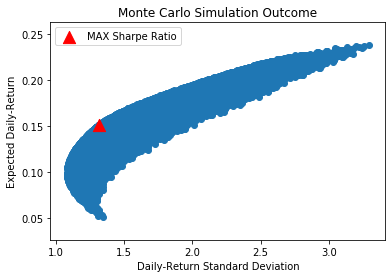

In [9]:
#透過蒙地卡羅模擬投資組合權重，繪製出投資機會集合，並找到效率前緣所在，以及Sharpe Ratio最高的投資組合。
plt.scatter(portfolioStandardDeviation,portfolioReturn)
plt.scatter(portfolioSDMAXSHARPE, portfolioReturnMAXSHARPE, label='MAX Sharpe Ratio', marker='^', c='r', s = 150)
plt.title("Monte Carlo Simulation Outcome")
plt.xlabel("Daily-Return Standard Deviation")
plt.ylabel("Expected Daily-Return")
plt.legend()